#**Mapa de calor de correlación entre ETFs de mercados bursátiles desarrollados y emergentes**

[*********************100%***********************]  5 of 5 completed


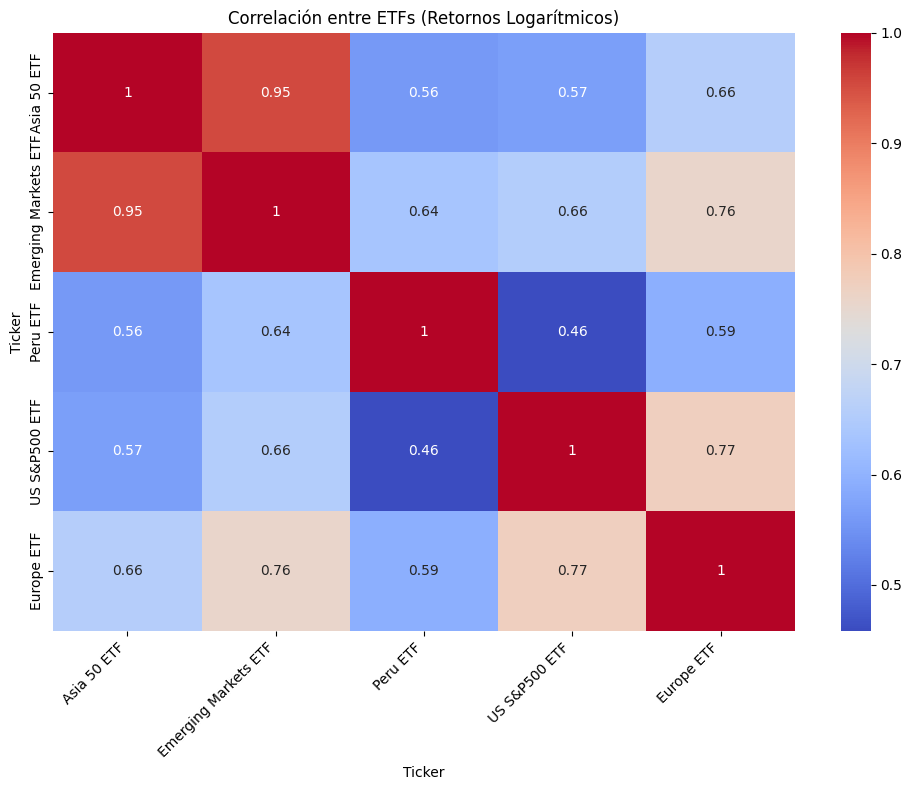

In [ ]:
# 1. Importación de librerías
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 2. Parámetros de configuración
def configure_analysis(etfs, years=5):

    #Configurando los parámetros básicos para el análisis de ETFs.

    end_date = datetime.now()
    start_date = end_date - timedelta(days=years * 252)
    return start_date, end_date, etfs

# 3. Descarga de datos
def fetch_data(etfs, start_date, end_date):

    #Descarga datos de cierre ajustado para los ETFs especificados.

    data_prices = yf.download(list(etfs.keys()), start=start_date, end=end_date)['Adj Close']
    return data_prices

# 4. Cálculo de retornos logarítmicos
def compute_log_returns(data_prices):

    #Calcula los retornos logarítmicos a partir de los datos de cierre ajustado.

    return np.log(data_prices / data_prices.shift(1)).dropna()

# 5. Visualización de correlaciones
def plot_correlation_matrix(returns, etfs):

    #Generando un heatmap con la correlación entre los ETFs.

    plt.figure(figsize=(10, 8))
    sns.heatmap(
        returns.corr(),
        annot=True,
        cmap='coolwarm',
        xticklabels=[etfs[symbol] for symbol in returns.columns],
        yticklabels=[etfs[symbol] for symbol in returns.columns]
    )
    plt.title('Correlación entre ETFs (Retornos Logarítmicos)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# 6. Ejecución del análisis
if __name__ == "__main__":
    #Configuración inicial
    etfs = {
        'EPU': 'Peru ETF',
        'SPY': 'US S&P500 ETF',
        'EEM': 'Emerging Markets ETF',
        'VGK': 'Europe ETF',
        'AIA': 'Asia 50 ETF'
    }
    start_date, end_date, etfs = configure_analysis(etfs)

    #Descarga y procesamiento de datos
    try:
        data1 = fetch_data(etfs, start_date, end_date)
        log_returns = compute_log_returns(data1)

        #Visualización
        plot_correlation_matrix(log_returns, etfs)
    except Exception as e:
        print(f"Error durante el análisis: {e}")
